In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from wrangle import wrangle_zillow, split_data

# Exercise 1

- Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
df = wrangle_zillow()
df.head(3)

Reading cleaned data from csv file...


,bedrooms,bathrooms,sqr_feet,tax_value,year_built,taxamount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0


In [3]:
df.year_built = df.year_built.astype(int)

In [4]:
df.year_built = df.year_built.astype(object)

In [5]:
df.head(3)

,bedrooms,bathrooms,sqr_feet,tax_value,year_built,taxamount,fips
0,4.0,2.0,3633.0,296425.0,2005,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926,7924.68,6037.0


In [6]:
train, validate, test = split_data(df)

train -> (1198531, 7)
validate -> (513657, 7)
test -> (428047, 7)


In [7]:
train.head()

,bedrooms,bathrooms,sqr_feet,tax_value,year_built,taxamount,fips
1238764,4.0,2.0,1914.0,1189782.0,1963,13458.06,6059.0
1056041,2.0,1.0,825.0,380000.0,1950,4748.34,6037.0
67565,2.0,1.0,1283.0,336441.0,1939,4201.04,6037.0
983088,4.0,2.5,2104.0,104786.0,1969,1422.92,6059.0
287440,3.0,2.0,1387.0,483225.0,1956,5267.44,6059.0


In [13]:
# Define the scaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit
train['tax_value_scaled'] = scaler.fit_transform(train[['tax_value']])
train.head()

,bedrooms,bathrooms,sqr_feet,tax_value,year_built,taxamount,fips,tax_value_scaled
1238764,4.0,2.0,1914.0,1189782.0,1963,13458.06,6059.0,0.014301
1056041,2.0,1.0,825.0,380000.0,1950,4748.34,6037.0,0.004567
67565,2.0,1.0,1283.0,336441.0,1939,4201.04,6037.0,0.004044
983088,4.0,2.5,2104.0,104786.0,1969,1422.92,6059.0,0.001259
287440,3.0,2.0,1387.0,483225.0,1956,5267.44,6059.0,0.005808


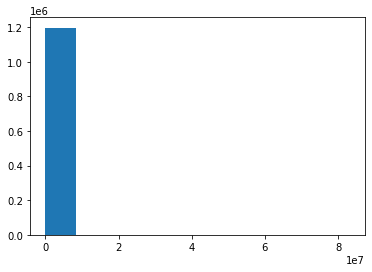

In [15]:
# Original tax value
plt.hist(train.tax_value)
plt.show()

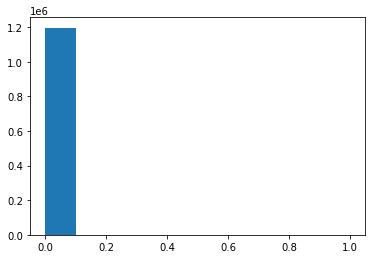

In [16]:
# Scaled tax value
plt.hist(train.tax_value_scaled)
plt.show()

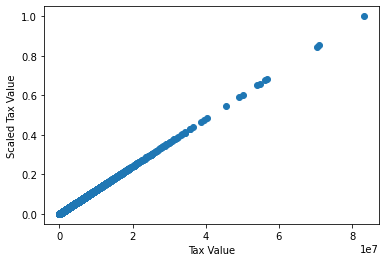

In [17]:
# 
plt.scatter(train.tax_value, train.tax_value_scaled)
plt.xlabel('Tax Value')
plt.ylabel('Scaled Tax Value')
plt.show()

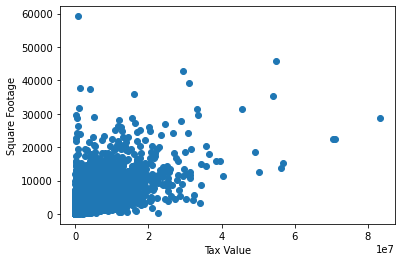

In [18]:
# Compare with other variables
# Original Tax Value
plt.scatter(train.tax_value, train.sqr_feet)
plt.xlabel('Tax Value')
plt.ylabel('Square Footage')
plt.show()

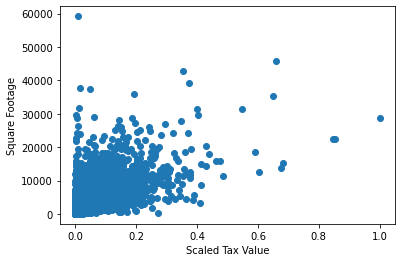

In [19]:
# Scaled Tax Value
plt.scatter(train.tax_value_scaled, train.sqr_feet)
plt.xlabel('Scaled Tax Value')
plt.ylabel('Square Footage')
plt.show()

In [23]:
# Lets build a function to use for each column

def visualize_scaled(scaler, scaler_name, train, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout()
    plt.show()

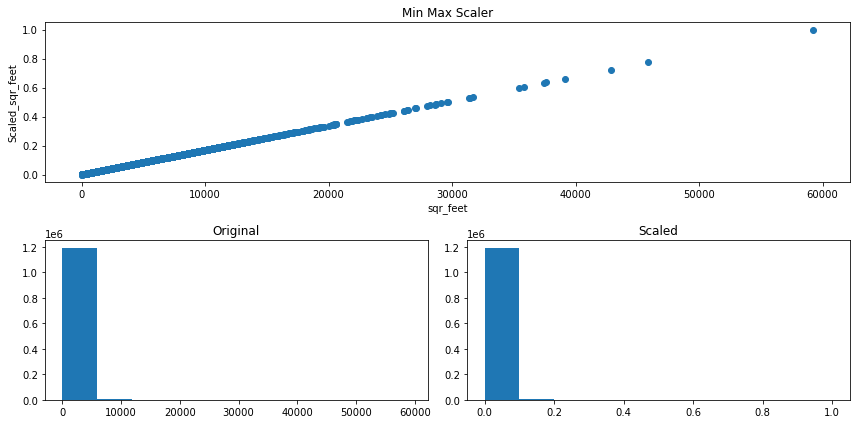

In [24]:
# Square Feet with a MinMax Scaler
visualize_scaled(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler',train, 'sqr_feet')

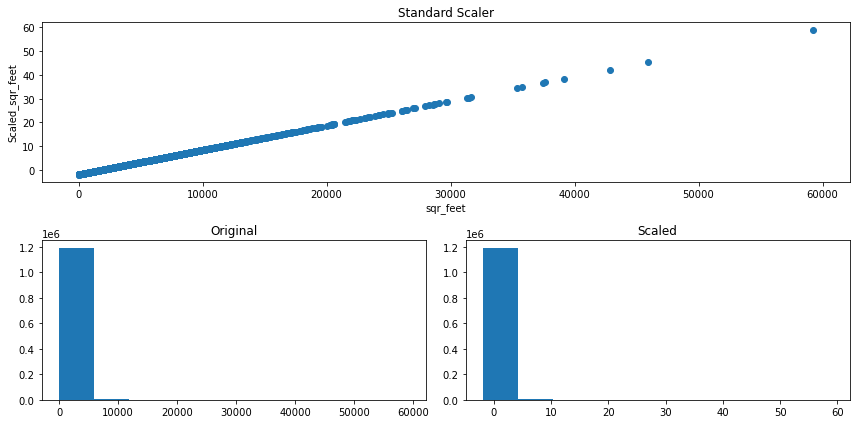

In [26]:
# Square Feet with a Standard Scaler
visualize_scaled(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', train, 'sqr_feet')

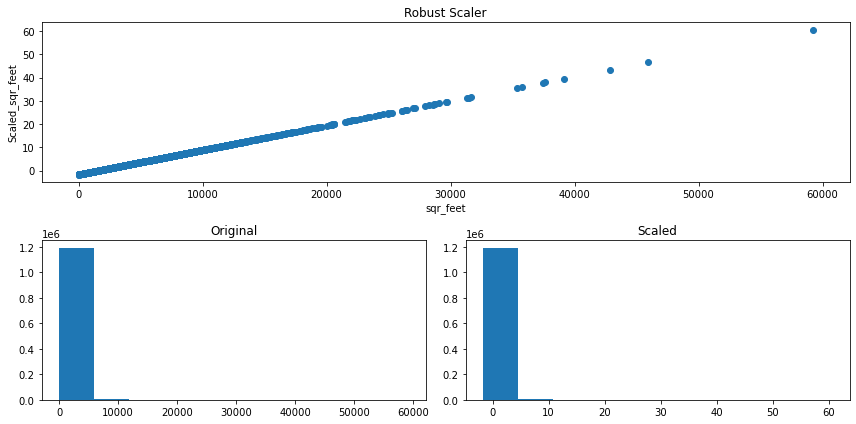

In [27]:
# Square Feet with a Robust Scaler
visualize_scaled(sklearn.preprocessing.RobustScaler(), 'Robust Scaler',train, 'sqr_feet')

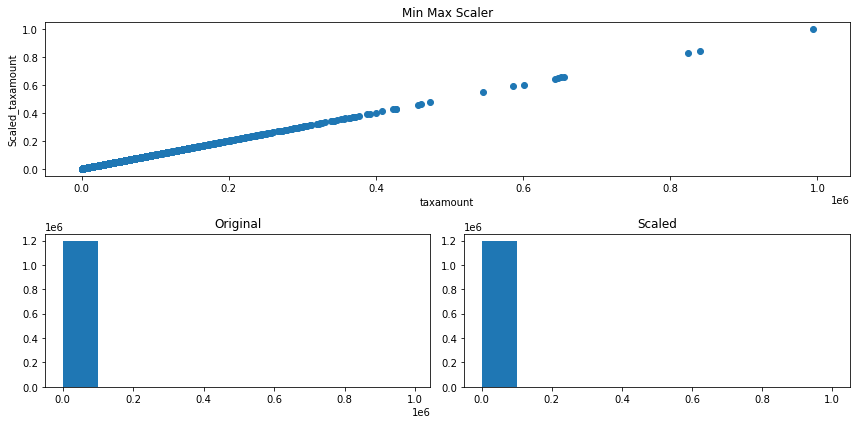

In [28]:
# Tax Amount with a MinMax Scaler
visualize_scaled(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler',train, 'taxamount')

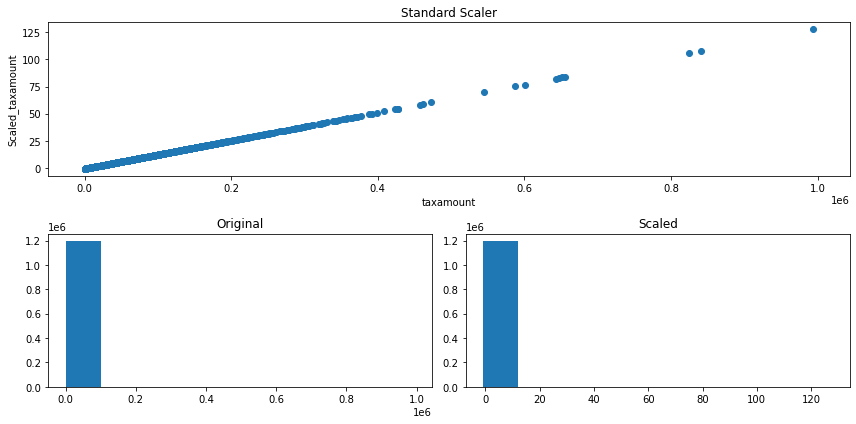

In [29]:
# Tax Amount with a Standard Scaler
visualize_scaled(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', train, 'taxamount')

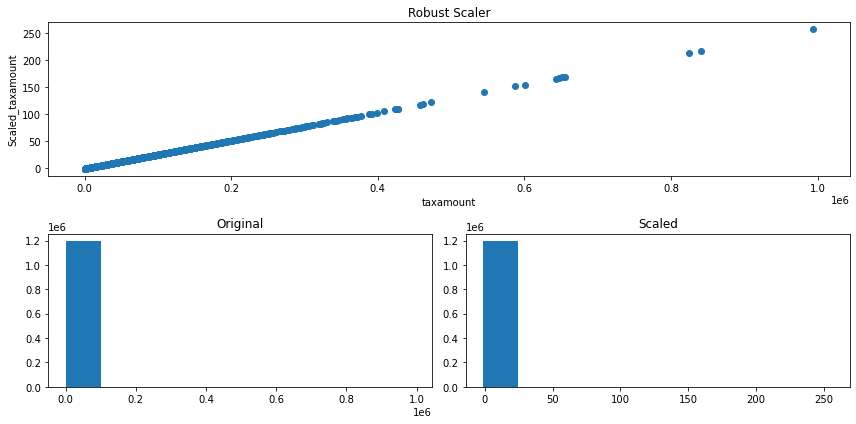

In [30]:
# Tax Amount with a Robust Scaler
visualize_scaled(sklearn.preprocessing.RobustScaler(), 'Robust Scaler',train, 'taxamount')

In [31]:
# I think we should be good there

# Exercise 2

- Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [32]:
train.head()

,bedrooms,bathrooms,sqr_feet,tax_value,year_built,taxamount,fips,tax_value_scaled
1238764,4.0,2.0,1914.0,1189782.0,1963,13458.06,6059.0,0.014301
1056041,2.0,1.0,825.0,380000.0,1950,4748.34,6037.0,0.004567
67565,2.0,1.0,1283.0,336441.0,1939,4201.04,6037.0,0.004044
983088,4.0,2.5,2104.0,104786.0,1969,1422.92,6059.0,0.001259
287440,3.0,2.0,1387.0,483225.0,1956,5267.44,6059.0,0.005808


In [36]:
# Verify if .inverse_transform works

scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[['tax_value', 'taxamount']])

scaled_df = pd.DataFrame(scaled, index = train.index, columns = ['tax_value', 'taxamount'])

scaled_df.head()

,tax_value,taxamount
1238764,0.014301,0.013533
1056041,0.004567,0.004771
67565,0.004044,0.004220
983088,0.001259,0.001425
287440,0.005808,0.005293


In [41]:
# Use inverse transform

pd.DataFrame(scaler.inverse_transform(scaled_df), index = train.index, columns = ['tax_value', 'taxamount']).head()

,tax_value,taxamount
1238764,1189782.0,13458.06
1056041,380000.0,4748.34
67565,336441.0,4201.04
983088,104786.0,1422.92
287440,483225.0,5267.44


In [42]:
# Reversal of scaling successful! 

# Exercise 3

- Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

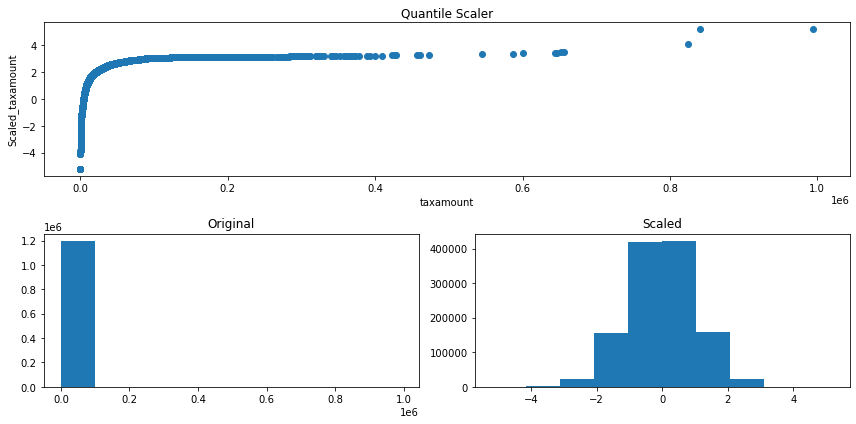

In [43]:
#visualize monthly charges quantile transformation with 'normal' output

# Tax Amount
visualize_scaled(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', train, 'taxamount')


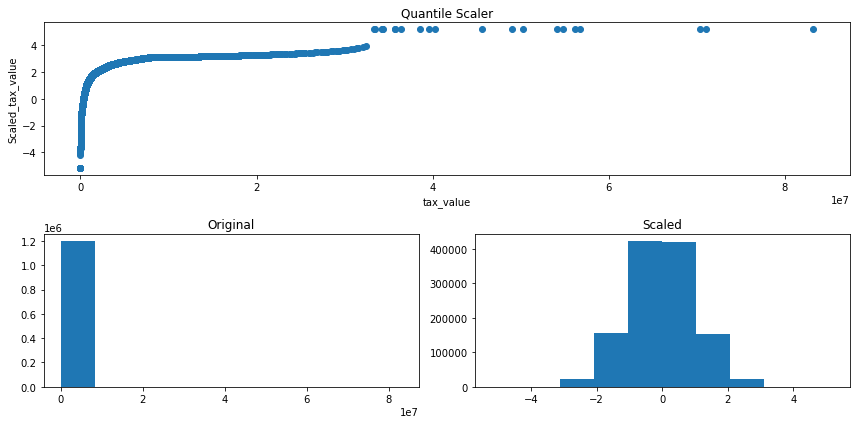

In [44]:
# Tax Value

visualize_scaled(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', train, 'tax_value')


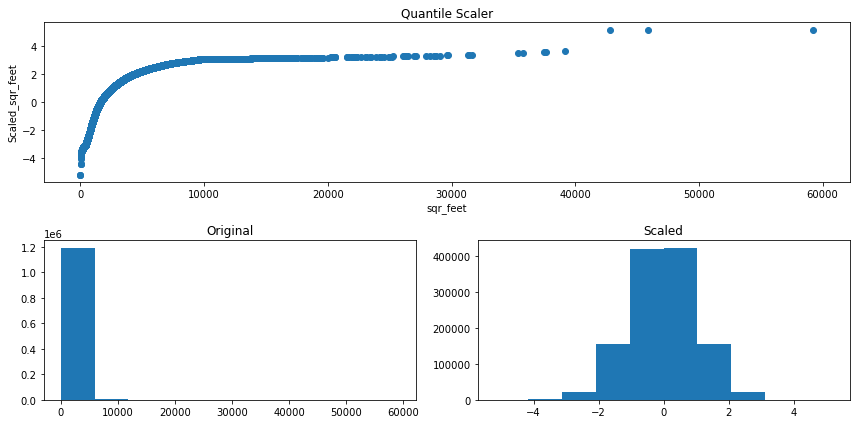

In [45]:
# Square Feet

visualize_scaled(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', train, 'sqr_feet')


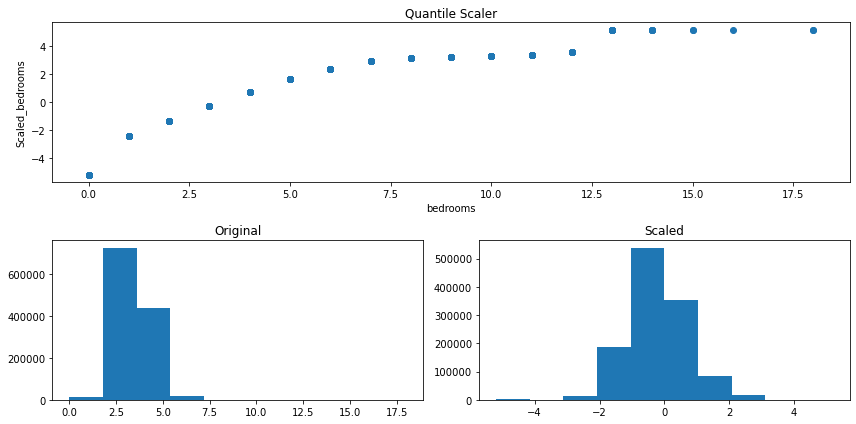

In [46]:
# Bedrooms

visualize_scaled(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', train, 'bedrooms')


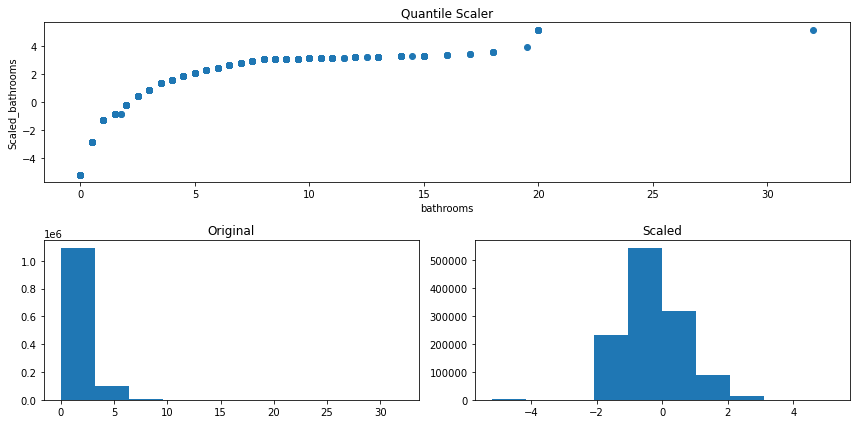

In [47]:
# Bathrooms

visualize_scaled(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', train, 'bathrooms')


### Takeaways

- The quantile scaler allowed us to visualize the normal distributions in our data


# Exercise 4

- Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

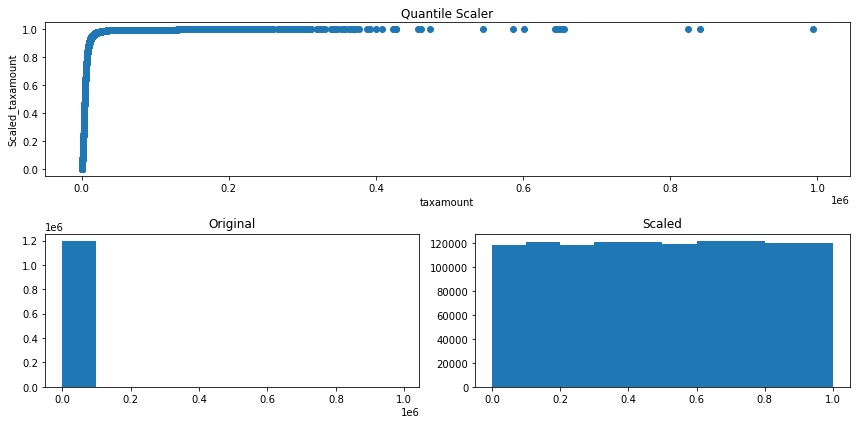

In [48]:
# Tax Amount without 'output_distribution'

visualize_scaled(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', train, 'taxamount')


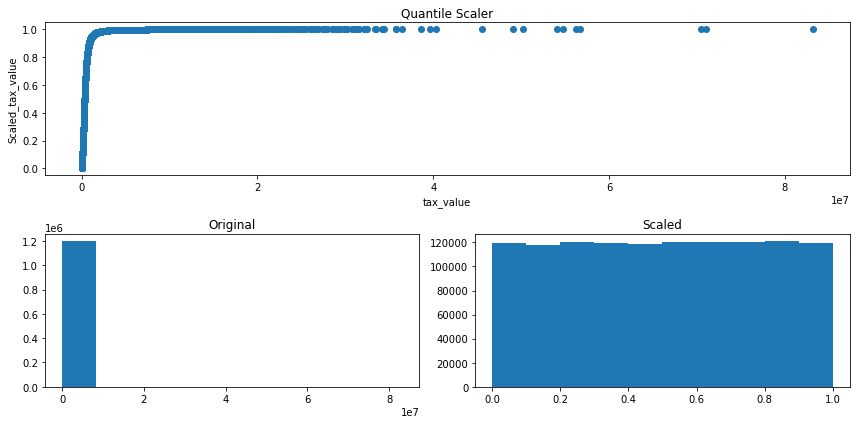

In [49]:
# Tax Value without 'output_distribution'

visualize_scaled(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', train, 'tax_value')


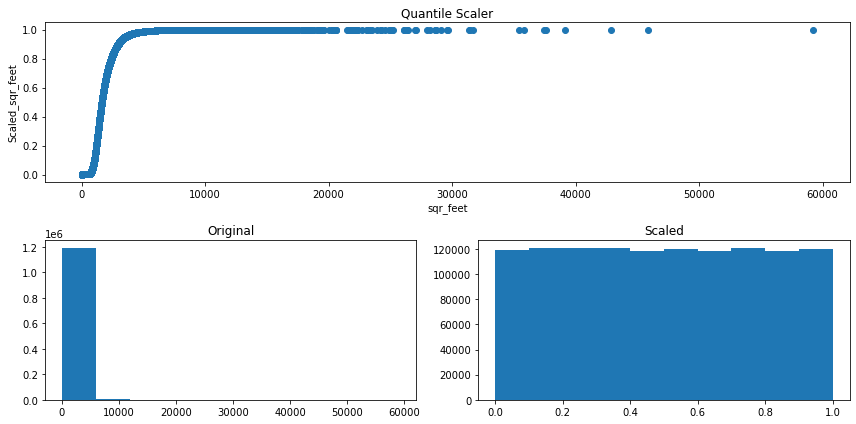

In [50]:
# Square Feet without 'output_distribution'

visualize_scaled(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', train, 'sqr_feet')


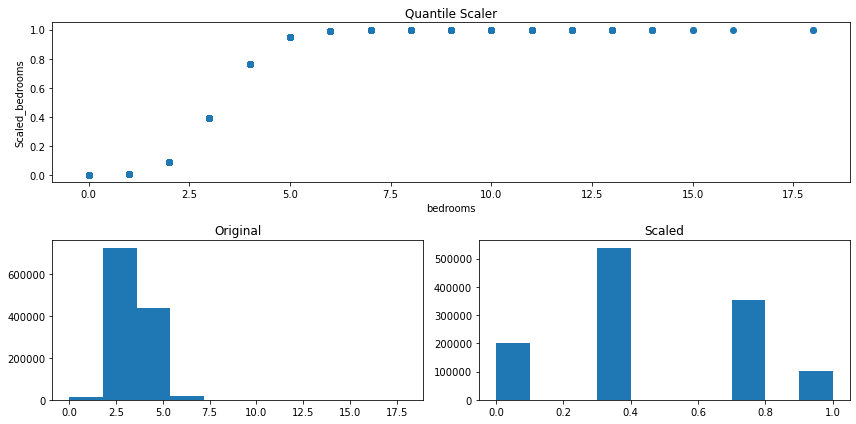

In [51]:
# Bedrooms without 'output_distribution'

visualize_scaled(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', train, 'bedrooms')


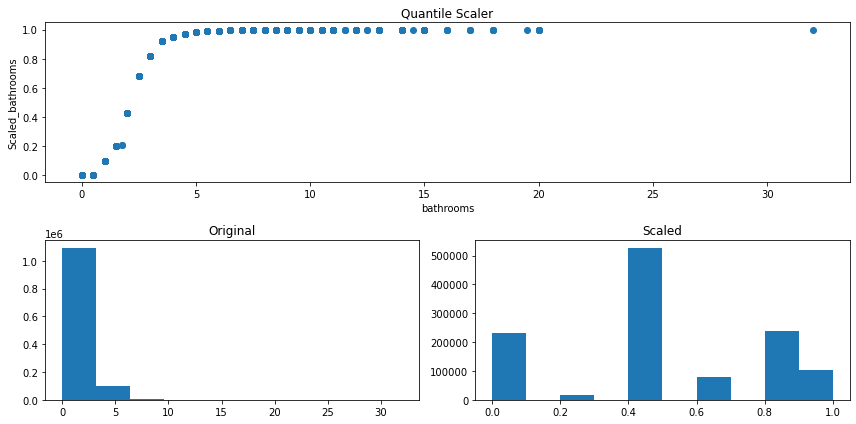

In [52]:
# Bathrooms without 'output_distribution'

visualize_scaled(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', train, 'bathrooms')


### Takeaways

- Without the 'output_distribution' arguement, the scale change helps visualize in a more uniform way
- Appears to work much better on bedrooms and bathrooms.

# Exercise 5

- Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!